In [1]:
import librosa
track_path = '/content/drive/MyDrive/PROJ/LIE/deceptive_wav/trial_lie_001.wav'
y,sr = librosa.load(track_path,sr=10000)
print(y)

[ 3.3308648e-10 -9.3379915e-11 -3.2878603e-10 ... -2.5651287e-04
  3.0484717e-04  3.8200078e-04]


In [2]:
len(y)

169867

In [3]:
# cut each track in pieces before doing anything else

def cut_track(track):
  start = 0
  end = len(track)
  
  track_pieces = []

  while start + 10000 < end:
    track_pieces.append(track[start:start+10000])

    start += 10000

  return track_pieces
x = cut_track(track_path)

In [4]:
def prepare_track(track_path):
  list_matrices = []
  y,sr = librosa.load(track_path,sr=22050)
  track_pieces = cut_track(y)
  for track_piece in track_pieces:
    melspect = librosa.feature.melspectrogram(y=track_piece)
    list_matrices.append(melspect)
  return list_matrices
prepare_track(track_path)

[array([[1.41547134e-04, 1.73895523e-01, 1.08282053e+00, ...,
         2.61797686e-03, 1.84585550e-03, 2.28063273e-03],
        [3.49431619e-04, 1.38094500e-01, 5.03162801e-01, ...,
         1.44883944e-03, 2.00167135e-03, 1.32986181e-03],
        [4.13232861e-04, 2.85246260e-02, 4.48273346e-02, ...,
         1.50944071e-03, 1.64056255e-03, 7.05288630e-03],
        ...,
        [3.60730823e-08, 1.89664263e-06, 3.49218885e-06, ...,
         3.06336406e-05, 2.01067141e-05, 3.71463066e-05],
        [2.01229593e-08, 1.45375429e-06, 2.78065727e-06, ...,
         1.34076981e-05, 1.52195607e-05, 3.63136314e-05],
        [1.92522998e-09, 1.08544796e-07, 2.45309735e-07, ...,
         1.52264806e-06, 1.83718760e-06, 2.69190423e-05]], dtype=float32),
 array([[6.4997198e-03, 8.0177682e-03, 5.7794657e-03, ..., 1.1273886e-02,
         1.0760687e-02, 4.8344187e-03],
        [9.4206389e-03, 4.8658447e-03, 1.8196910e-03, ..., 5.4304730e-03,
         5.4747532e-03, 5.1467586e-03],
        [8.2185240e-03

In [5]:
# all tracks will be the X features and deceptive will be the target y
all_tracks = []
deceptive = []
truth = []
for i in range(1,61):
    if i<10:
        truth.append('trial_truth_00' + str(i) + '.wav')
    else:
        truth.append('trial_truth_0' + str(i) + '.wav')
print(truth)

['trial_truth_001.wav', 'trial_truth_002.wav', 'trial_truth_003.wav', 'trial_truth_004.wav', 'trial_truth_005.wav', 'trial_truth_006.wav', 'trial_truth_007.wav', 'trial_truth_008.wav', 'trial_truth_009.wav', 'trial_truth_010.wav', 'trial_truth_011.wav', 'trial_truth_012.wav', 'trial_truth_013.wav', 'trial_truth_014.wav', 'trial_truth_015.wav', 'trial_truth_016.wav', 'trial_truth_017.wav', 'trial_truth_018.wav', 'trial_truth_019.wav', 'trial_truth_020.wav', 'trial_truth_021.wav', 'trial_truth_022.wav', 'trial_truth_023.wav', 'trial_truth_024.wav', 'trial_truth_025.wav', 'trial_truth_026.wav', 'trial_truth_027.wav', 'trial_truth_028.wav', 'trial_truth_029.wav', 'trial_truth_030.wav', 'trial_truth_031.wav', 'trial_truth_032.wav', 'trial_truth_033.wav', 'trial_truth_034.wav', 'trial_truth_035.wav', 'trial_truth_036.wav', 'trial_truth_037.wav', 'trial_truth_038.wav', 'trial_truth_039.wav', 'trial_truth_040.wav', 'trial_truth_041.wav', 'trial_truth_042.wav', 'trial_truth_043.wav', 'trial_tru

In [6]:
# add all the tracks that are in the truth folder
for track in truth:
   track_pieces = prepare_track('/content/drive/MyDrive/PROJ/TRUTH/truthful_wav/' + track)
   all_tracks += track_pieces
   deceptive += ([1]*len(track_pieces))

In [7]:
print(len(all_tracks))

3714


In [8]:
print(len(deceptive))

3714


In [9]:
print(deceptive)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

In [10]:
lies = []
for i in range(1,62):
    if i<10:
        lies.append('trial_lie_00' + str(i) + '.wav')
    else:
        lies.append('trial_lie_0' + str(i) + '.wav')
print(lies)

['trial_lie_001.wav', 'trial_lie_002.wav', 'trial_lie_003.wav', 'trial_lie_004.wav', 'trial_lie_005.wav', 'trial_lie_006.wav', 'trial_lie_007.wav', 'trial_lie_008.wav', 'trial_lie_009.wav', 'trial_lie_010.wav', 'trial_lie_011.wav', 'trial_lie_012.wav', 'trial_lie_013.wav', 'trial_lie_014.wav', 'trial_lie_015.wav', 'trial_lie_016.wav', 'trial_lie_017.wav', 'trial_lie_018.wav', 'trial_lie_019.wav', 'trial_lie_020.wav', 'trial_lie_021.wav', 'trial_lie_022.wav', 'trial_lie_023.wav', 'trial_lie_024.wav', 'trial_lie_025.wav', 'trial_lie_026.wav', 'trial_lie_027.wav', 'trial_lie_028.wav', 'trial_lie_029.wav', 'trial_lie_030.wav', 'trial_lie_031.wav', 'trial_lie_032.wav', 'trial_lie_033.wav', 'trial_lie_034.wav', 'trial_lie_035.wav', 'trial_lie_036.wav', 'trial_lie_037.wav', 'trial_lie_038.wav', 'trial_lie_039.wav', 'trial_lie_040.wav', 'trial_lie_041.wav', 'trial_lie_042.wav', 'trial_lie_043.wav', 'trial_lie_044.wav', 'trial_lie_045.wav', 'trial_lie_046.wav', 'trial_lie_047.wav', 'trial_lie_0

In [11]:
# add all the tracks that are in the lies folder
for track in lies:
   track_pieces = prepare_track('/content/drive/MyDrive/PROJ/LIE/deceptive_wav/' + track)
   all_tracks += track_pieces
   deceptive += ([0]*len(track_pieces))

In [12]:
print(len(all_tracks))

7415


In [13]:
print(len(deceptive))

7415


In [14]:
#splitting into training and test sets
import numpy as np
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(np.array(all_tracks), 
                                                    np.array(deceptive),
                                                    test_size=0.2,
                                                    random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, 
                                                    y_train,
                                                    test_size=0.1,
                                                    random_state=42)

In [15]:
X_train.shape

(5338, 128, 20)

In [16]:
X_val.shape

(594, 128, 20)

In [17]:
X_test.shape

(1483, 128, 20)

In [18]:
X_train = X_train.reshape(5338, 128, 20, 1)
X_val = X_val.reshape(594, 128, 20, 1)
X_test = X_test.reshape(1483, 128, 20, 1)

In [19]:
#Creating cnn model
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

#Creating sequential model
model = models.Sequential()
#first layer is a relu convolutional 2d layer with 3x3 kernel
model.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(128, 20, 1), padding='SAME'))
#second layer is a max pooling layer with 2x2 kernel
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.2))
#third layer is a relu conv 2d layer with 3x3 kernel
model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='SAME'))
model.add(layers.MaxPooling2D((2, 2)))
#fourth layer is max pooling layer with 2x2 kernel
model.add(layers.Dropout(0.2))
#fifth layer is relu conv 2d layer with 3x3 kernel
model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='SAME'))
model.add(layers.Flatten())
#we add a flattening layer that flattens the input to a single 1d vector
model.add(layers.Dense(128, activation='relu'))
#we supply this to a dense relu layer with 64 nodes
#output layer is a dense layer with 1 node
model.add(layers.Dense(1))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 20, 64)       640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 10, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 64, 10, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 10, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 32, 5, 64)        0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 32, 5, 64)         0

In [20]:
from tensorflow.keras.optimizers import RMSprop
#we compile the above model and fit it to the training data using hinge loss, rmsprop as the optimizer optimizing accuracy
model.compile(loss='hinge',
              optimizer=RMSprop(learning_rate=0.005),
              metrics='accuracy')

history = model.fit(X_train, y_train, epochs=50)

Epoch 1/50
167/167 [==============================] - 31s 182ms/step - loss: 1.8621 - accuracy: 0.5704
Epoch 2/50
167/167 [==============================] - 29s 176ms/step - loss: 0.8456 - accuracy: 0.6695
Epoch 3/50
167/167 [==============================] - 29s 176ms/step - loss: 0.6640 - accuracy: 0.7379
Epoch 4/50
167/167 [==============================] - 30s 182ms/step - loss: 0.6005 - accuracy: 0.7578
Epoch 5/50
167/167 [==============================] - 30s 177ms/step - loss: 0.5741 - accuracy: 0.7735
Epoch 6/50
167/167 [==============================] - 29s 175ms/step - loss: 0.5608 - accuracy: 0.7827
Epoch 7/50
167/167 [==============================] - 29s 175ms/step - loss: 0.4974 - accuracy: 0.7958
Epoch 8/50
167/167 [==============================] - 30s 177ms/step - loss: 0.4866 - accuracy: 0.8029
Epoch 9/50
167/167 [==============================] - 31s 185ms/step - loss: 0.4750 - accuracy: 0.8136
Epoch 10/50
167/167 [==============================] - 30s 177ms/step - l

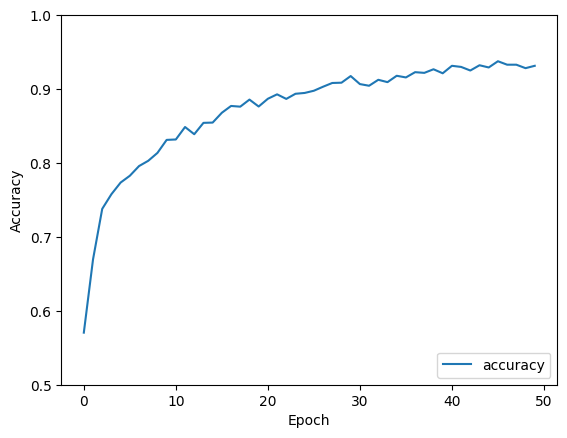

In [21]:
import matplotlib.pyplot as plt
#we plot the accuracy to epoch number
plt.plot(history.history['accuracy'], label='accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

In [22]:
validation_loss, validation_acc = model.evaluate(X_val,  y_val, verbose=2)

19/19 - 1s - loss: 1.0302 - accuracy: 0.8316 - 883ms/epoch - 46ms/step


In [23]:
test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=2)

47/47 - 2s - loss: 1.2090 - accuracy: 0.8200 - 2s/epoch - 43ms/step


In [24]:
import tensorflow_model_optimization as tfmot

quantize_model = tfmot.quantization.keras.quantize_model
q_aware_model = quantize_model(model)

q_aware_model.compile(optimizer=RMSprop(learning_rate=0.005),
              loss='hinge',
              metrics=['accuracy'])

q_aware_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 quantize_layer (QuantizeLay  (None, 128, 20, 1)       3         
 er)                                                             
                                                                 
 quant_conv2d (QuantizeWrapp  (None, 128, 20, 64)      771       
 erV2)                                                           
                                                                 
 quant_max_pooling2d (Quanti  (None, 64, 10, 64)       1         
 zeWrapperV2)                                                    
                                                                 
 quant_dropout (QuantizeWrap  (None, 64, 10, 64)       1         
 perV2)                                                          
                                                                 
 quant_conv2d_1 (QuantizeWra  (None, 64, 10, 64)       3

In [27]:
history = q_aware_model.fit(X_train, y_train, epochs=50)

Epoch 1/50
167/167 [==============================] - 40s 237ms/step - loss: 0.7810 - accuracy: 0.6579
Epoch 2/50
167/167 [==============================] - 36s 216ms/step - loss: 0.7539 - accuracy: 0.6609
Epoch 3/50
167/167 [==============================] - 36s 217ms/step - loss: 0.7973 - accuracy: 0.6577
Epoch 4/50
167/167 [==============================] - 35s 208ms/step - loss: 0.7700 - accuracy: 0.6635
Epoch 5/50
167/167 [==============================] - 36s 217ms/step - loss: 0.7684 - accuracy: 0.6624
Epoch 6/50
167/167 [==============================] - 36s 217ms/step - loss: 0.7448 - accuracy: 0.6673
Epoch 7/50
167/167 [==============================] - 35s 208ms/step - loss: 0.7586 - accuracy: 0.6619
Epoch 8/50
167/167 [==============================] - 36s 219ms/step - loss: 0.7384 - accuracy: 0.6622
Epoch 9/50
167/167 [==============================] - 36s 217ms/step - loss: 0.7368 - accuracy: 0.6635
Epoch 10/50
167/167 [==============================] - 35s 208ms/step - l

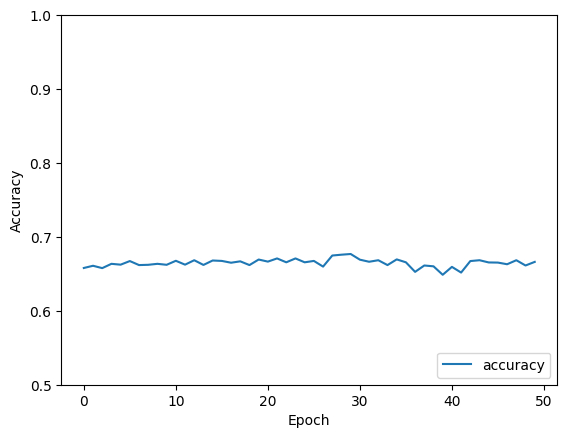

In [28]:
import matplotlib.pyplot as plt
#we plot the accuracy to epoch number
plt.plot(history.history['accuracy'], label='accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

In [29]:
validation_loss, validation_acc = q_aware_model.evaluate(X_val,  y_val, verbose=2)

19/19 - 1s - loss: 1.8394 - accuracy: 0.6178 - 926ms/epoch - 49ms/step


In [30]:
test_loss, test_acc = q_aware_model.evaluate(X_test,  y_test, verbose=2)

47/47 - 2s - loss: 1.5898 - accuracy: 0.6156 - 2s/epoch - 50ms/step
